**Project 8 – Unveiling the Android App Market (Google Play Store Analysis)**

Step 1: Import Libraries and Load Data

Import libraries and read both datasets.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # Import WordCloud
from textblob import TextBlob

In [3]:
# Load datasets
apps = pd.read_csv("/content/apps.csv")
reviews = pd.read_csv("/content/user_reviews.csv")

In [4]:
# Show first few rows
print("Apps Data:")
display(apps.head())
print("User Reviews:")
display(reviews.head())

Apps Data:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


User Reviews:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


 Step 2: Explore Basic Info

 Check shapes, columns, and missing values.

In [5]:
print("Apps Shape:", apps.shape)
print("Reviews Shape:", reviews.shape)

Apps Shape: (9659, 14)
Reviews Shape: (64295, 5)


In [7]:
print("Apps Columns:\n", apps.columns)
print("\nMissing Values in Apps:\n", apps.isnull().sum())
print("\nMissing Values in Reviews:\n", reviews.isnull().sum())

Apps Columns:
 Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

Missing Values in Apps:
 Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Missing Values in Reviews:
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


Step 3: Data Cleaning

Remove duplicates, clean numeric columns like Rating, Size, Installs, Price.

In [8]:
apps.drop_duplicates(inplace=True)

In [9]:
# Remove rows with invalid ratings
apps = apps[apps['Rating'] <= 5]

In [10]:
# Clean 'Installs' column
apps['Installs'] = apps['Installs'].replace('[+,]', '', regex=True).astype(int)

In [11]:
# Clean 'Price' column
apps['Price'] = apps['Price'].replace('[$]', '', regex=True).astype(float)

In [12]:
# Clean 'Size' column
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].replace('M', '', regex=True)
apps['Size'] = apps['Size'].replace('k', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

In [13]:
# Fill missing values with median
apps['Size'].fillna(apps['Size'].median(), inplace=True)
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)

/tmp/ipython-input-1524088422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Size'].fillna(apps['Size'].median(), inplace=True)
/tmp/ipython-input-1524088422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [14]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8196 non-null   int64  
 1   App             8196 non-null   object 
 2   Category        8196 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         8196 non-null   int64  
 5   Size            8196 non-null   float64
 6   Installs        8196 non-null   int64  
 7   Type            8196 non-null   object 
 8   Price           8196 non-null   float64
 9   Content Rating  8196 non-null   object 
 10  Genres          8196 non-null   object 
 11  Last Updated    8196 non-null   object 
 12  Current Ver     8192 non-null   object 
 13  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 960.5+ KB


Step 4: Category Exploration

See which app categories dominate the Play Store.

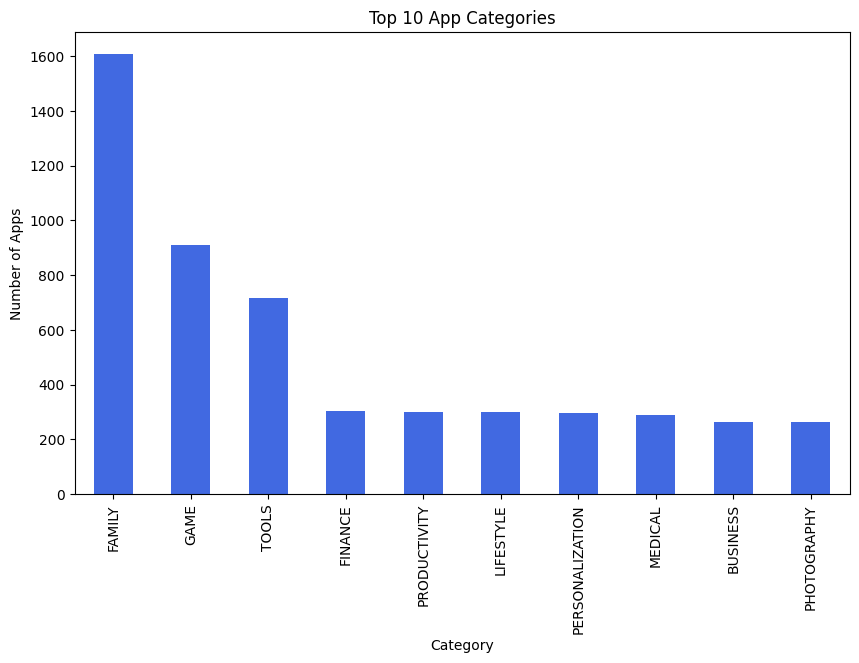

In [15]:
plt.figure(figsize=(10,6))
apps['Category'].value_counts().head(10).plot(kind='bar', color='royalblue')
plt.title("Top 10 App Categories")
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.show()

In [16]:
print("Total Categories:", apps['Category'].nunique())

Total Categories: 33


Step 5: Ratings and Popularity

Analyze app ratings and installs.

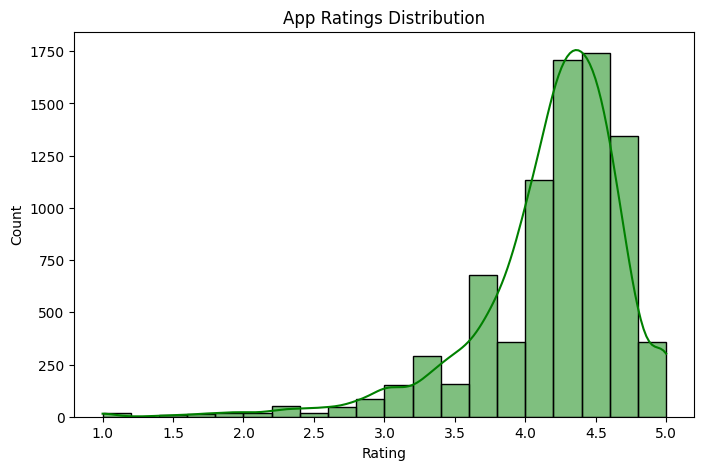

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, color='green', kde=True)
plt.title("App Ratings Distribution")
plt.show()

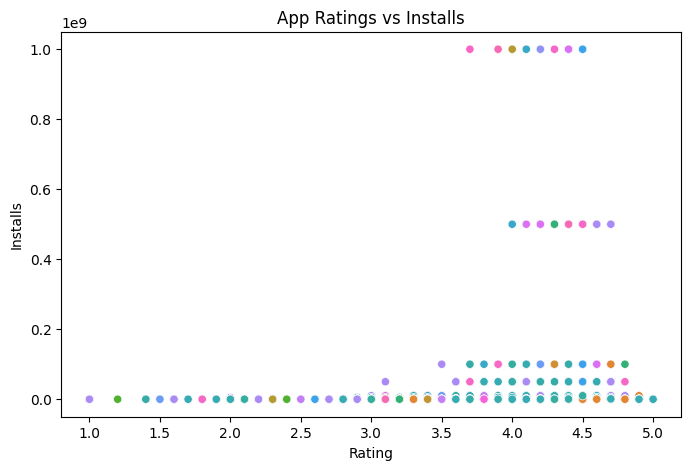

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=apps, hue='Category', legend=False)
plt.title("App Ratings vs Installs")
plt.show()

 Step 6: Paid vs Free Apps Comparison

 Compare average rating and installs between free and paid apps.

/tmp/ipython-input-1795629087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Rating', data=apps, palette='coolwarm')


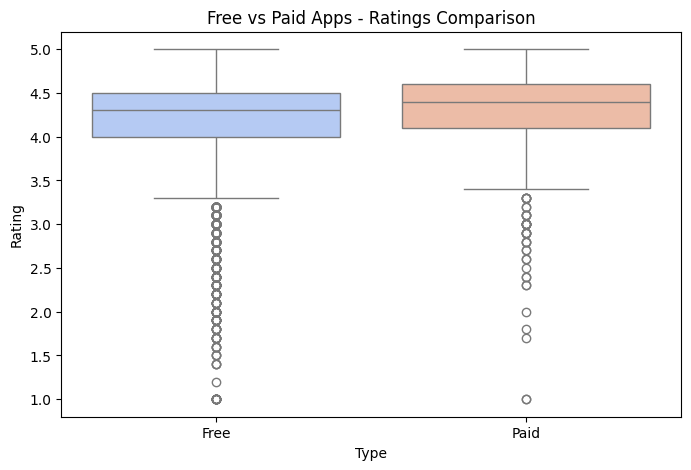

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=apps, palette='coolwarm')
plt.title("Free vs Paid Apps - Ratings Comparison")
plt.show()

In [20]:
avg_install = apps.groupby('Type')['Installs'].mean()
print("Average Installs:\n", avg_install)

Average Installs:
 Type
Free    9.886686e+06
Paid    9.495278e+04
Name: Installs, dtype: float64


Step 7: Analyze Size vs Rating

Check how app size affects user ratings.

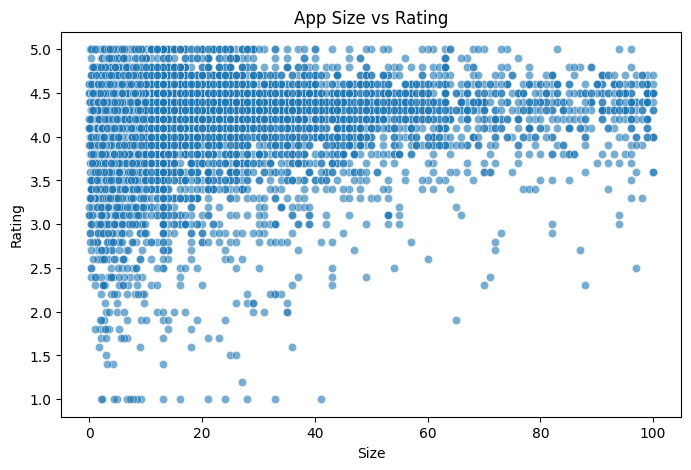

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rating', data=apps, alpha=0.6)
plt.title("App Size vs Rating")
plt.show()

Step 8: Sentiment Analysis

Use TextBlob to analyze user sentiment in reviews.

In [22]:
# Drop missing values
reviews = reviews.dropna(subset=['Translated_Review'])

In [25]:
# Define function to get polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [ ]:
reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(get_sentiment)

In [ ]:
# Label sentiment
reviews['Sentiment_Label'] = reviews['Sentiment_Score'].apply(lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral'))

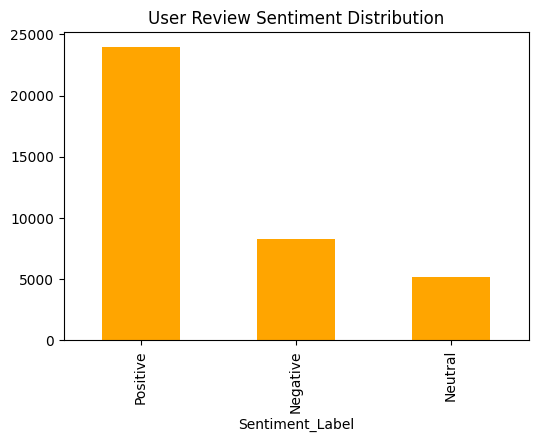

In [28]:
# Count sentiments
plt.figure(figsize=(6,4))
reviews['Sentiment_Label'].value_counts().plot(kind='bar', color='orange')
plt.title("User Review Sentiment Distribution")
plt.show()

Step 9: WordCloud of Reviews

Create word clouds for Positive and Negative reviews.

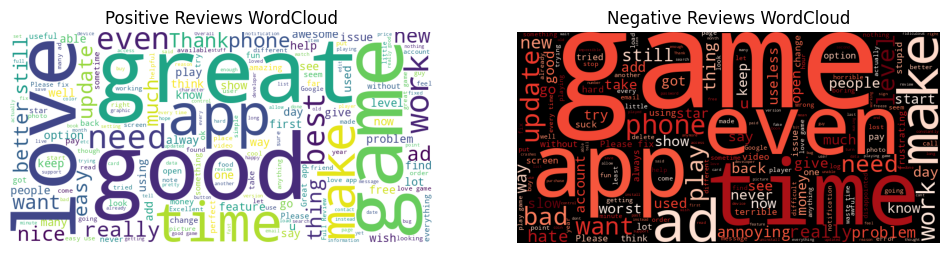

In [33]:
pos_text = " ".join(reviews[reviews['Sentiment_Label']=='Positive']['Translated_Review'])
neg_text = " ".join(reviews[reviews['Sentiment_Label']=='Negative']['Translated_Review'])

plt.figure(figsize=(12,6))
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.subplot(1,2,1)
plt.imshow(wc_pos)
plt.axis('off')
plt.title("Positive Reviews WordCloud")

plt.subplot(1,2,2)
plt.imshow(wc_neg)
plt.axis('off')
plt.title("Negative Reviews WordCloud")
plt.show()

Step 10: Key Insights

Summarize findings for report.

In [34]:
print("""
🔹 Insights:
1️. Most popular app categories are Family, Game, and Tools.
2️. Free apps dominate the Play Store, but paid apps generally have slightly higher ratings.
3️. Users prefer lightweight apps; very large apps may receive lower ratings.
4️. Sentiment analysis shows most reviews are positive, indicating overall satisfaction.
5️. Combining app metrics with user reviews helps understand market trends effectively.
""")


🔹 Insights:
1️. Most popular app categories are Family, Game, and Tools.
2️. Free apps dominate the Play Store, but paid apps generally have slightly higher ratings.
3️. Users prefer lightweight apps; very large apps may receive lower ratings.
4️. Sentiment analysis shows most reviews are positive, indicating overall satisfaction.
5️. Combining app metrics with user reviews helps understand market trends effectively.



Step 11: Save Cleaned Dataset

Save the cleaned dataset for future use.

In [35]:
apps.to_csv("cleaned_apps.csv", index=False)
print("Cleaned data saved as cleaned_apps.csv")

Cleaned data saved as cleaned_apps.csv
